# Demo for Rosenbrock function
In this notebook you will see the pipeline for generating the results seen in the report considering the Rosenbrock function.



In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

from helpers import *
import plots

## Rosenbrock function
* Minimum is about 1e-6

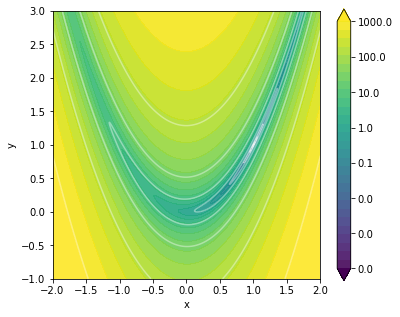

In [7]:
plots.visualize_rosenbrock()
plt.savefig("plots/rosenbrock.png", bbox_inches='tight')

## Gradient descent on Rosenbrock with random initialization


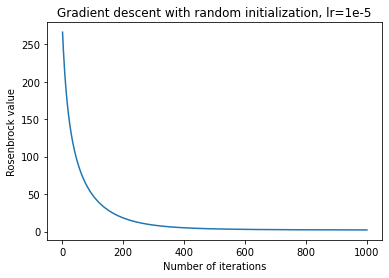

In [10]:
lr = 1e-5
max_num_iterations = 1000
num_trials = 1000

losses_1000 = np.zeros((max_num_iterations,num_trials))

for i in range(num_trials):
    x = random.uniform(-2, 2)
    y = random.uniform(-1, 3)
    objectives, xs = gradient_descent(rosenbrock, x, y, lr, max_num_iterations, verbose=0)
    losses_1000[:,i] = objectives

x = np.arange(1,max_num_iterations+1)
mean_losses_1000 = np.mean(losses_1000, axis=1)
plt.plot(x, mean_losses_1000)
plt.xlabel("Number of iterations")
plt.ylabel("Rosenbrock value")
plt.title("Gradient descent with random initialization, lr=1e-5")
plt.show()

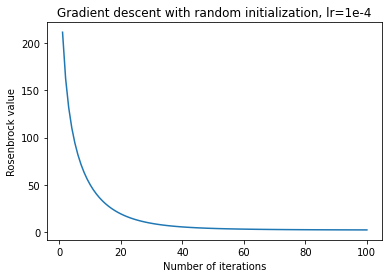

In [12]:
lr = 1e-4
max_num_iterations = 100
num_trials = 1000

losses_100 = np.zeros((max_num_iterations,num_trials))

for i in range(num_trials):
    x = random.uniform(-2, 2)
    y = random.uniform(-1, 3)
    objectives, xs = gradient_descent(rosenbrock, x, y, lr, max_num_iterations, verbose=False)
    losses_100[:,i] = objectives

x = np.arange(1,max_num_iterations+1)
mean_losses_100 = np.mean(losses_100, axis=1)
plt.plot(x, mean_losses_100)
plt.xlabel("Number of iterations")
plt.ylabel("Rosenbrock value")
plt.title("Gradient descent with random initialization, lr=1e-4")
plt.show()

## Gradient descent on Rosenbrock with bayesian opt initialization

* Running the following cells can take about 10 minutes in total. Decrease number of trials for fast run.

In [13]:
from bayes_opt import BayesianOptimization

rosenbrock = Rosenbrock(1, 100)

def negative_rosenbrock(x, y):
  return -1*rosenbrock(x,y)

pbounds = {"x": [-2, 2], "y": [-1, 3]}

#### Acquisition function: Upper confidence bound (UCB), lower learning rate


In [14]:
lr = 1e-5
max_num_iterations = 1000
num_trials = 1000
kappa = 0.1

In [15]:
bayes_opt_UCB_losses_LOW = np.zeros((max_num_iterations,num_trials))

for i in range(num_trials):
    if i % 100 == 0:
      print("Trial num: {}".format(i))
    optimizer = BayesianOptimization(f = negative_rosenbrock,
                                    pbounds = pbounds, 
                                    verbose = 0)
    optimizer.maximize(init_points = 5, n_iter = 5, acq="ucb", kappa=kappa)
    best = optimizer.max["params"]
    x = best["x"]
    y = best["y"]

    objectives, xs = gradient_descent(rosenbrock, x, y, lr, max_num_iterations, verbose=0)
    bayes_opt_UCB_losses_LOW[:,i] = objectives

Trial num: 0
Trial num: 100
Trial num: 200
Trial num: 300
Trial num: 400
Trial num: 500
Trial num: 600
Trial num: 700
Trial num: 800
Trial num: 900


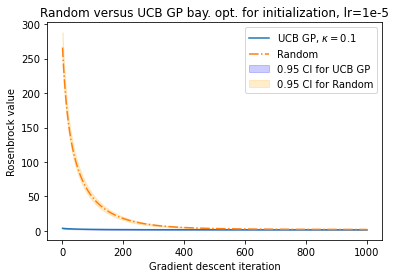

In [17]:
plots.plot_w_CI(bayes_opt_UCB_losses_LOW, losses_1000, max_num_iterations, 
                "Random versus UCB GP bay. opt. for initialization, lr=1e-5", 
                "Gradient descent iteration", 
                "Rosenbrock value", 
                "plots/rosenbrock_GP_95_CI_1000.pdf")

#### Acquisition function: Upper confidence bound (UCB), higher learning rate


In [18]:
lr = 1e-4
max_num_iterations = 100
num_trials = 1000
kappa = 0.1

In [19]:
bayes_opt_UCB_losses_HIGH = np.zeros((max_num_iterations,num_trials))

for i in range(num_trials):
    if i % 100 == 0:
      print("Trial num: {}".format(i))
    optimizer = BayesianOptimization(f = negative_rosenbrock,
                                    pbounds = pbounds, 
                                    verbose = 0)
    optimizer.maximize(init_points = 5, n_iter = 5, acq="ucb", kappa=kappa)
    best = optimizer.max["params"]
    x = best["x"]
    y = best["y"]

    objectives, xs = gradient_descent(rosenbrock, x, y, lr, max_num_iterations, verbose=0)
    bayes_opt_UCB_losses_HIGH[:,i] = objectives



Trial num: 0
Trial num: 100
Trial num: 200
Trial num: 300
Trial num: 400
Trial num: 500
Trial num: 600
Trial num: 700
Trial num: 800
Trial num: 900


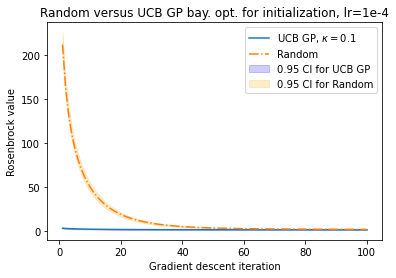

In [20]:
plots.plot_w_CI(bayes_opt_UCB_losses_HIGH, losses_100, max_num_iterations, 
                "Random versus UCB GP bay. opt. for initialization, lr=1e-4", 
                "Gradient descent iteration", 
                "Rosenbrock value", 
                "plots/rosenbrock_GP_95_CI_100.pdf")

#### Finally a subplot with the results combined



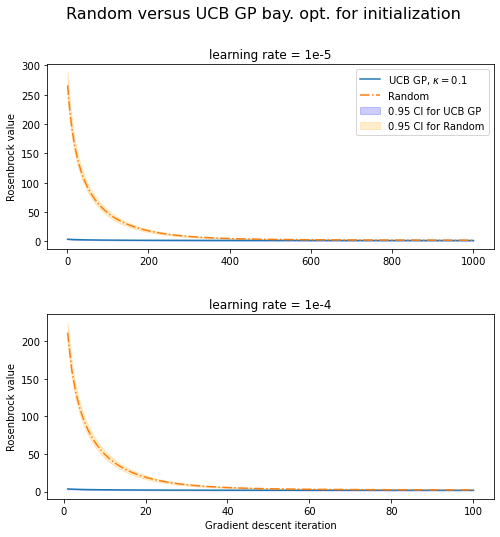

In [21]:
plots.plot_w_CI_subplot([bayes_opt_UCB_losses_LOW,bayes_opt_UCB_losses_HIGH], [losses_1000, losses_100], [1000,100], 
                        "Random versus UCB GP bay. opt. for initialization", 
                        ["learning rate = 1e-5", "learning rate = 1e-4"],
                        ["Gradient descent iteration","Gradient descent iteration"], 
                        ["Rosenbrock value","Rosenbrock value"], 
                        "plots/rosenbrock_GP_95_CI_SUBPLOT.pdf")